In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import warnings

warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('./Iris.csv')

### About Flower Features

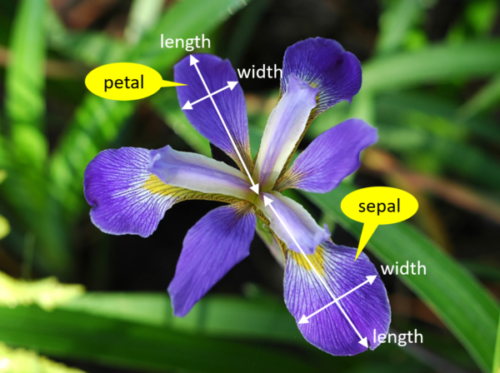

In [47]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [49]:
# 3 unique types of flower
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
df = df.drop(['Id'],axis=1)

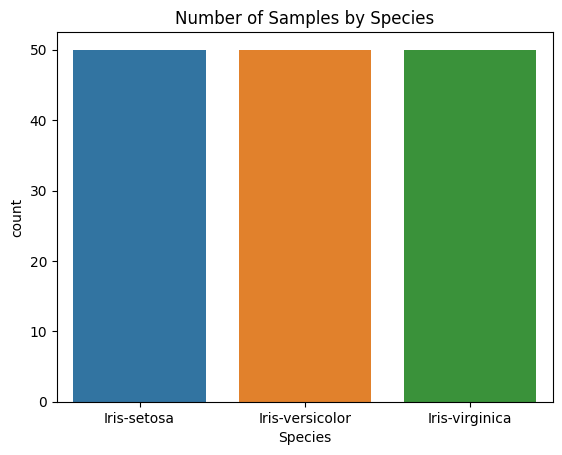

In [51]:
bardf = df.groupby(['Species']).size().reset_index(name='count')
sns.barplot(data=bardf,x='Species',y='count')
plt.title("Number of Samples by Species")
plt.show()

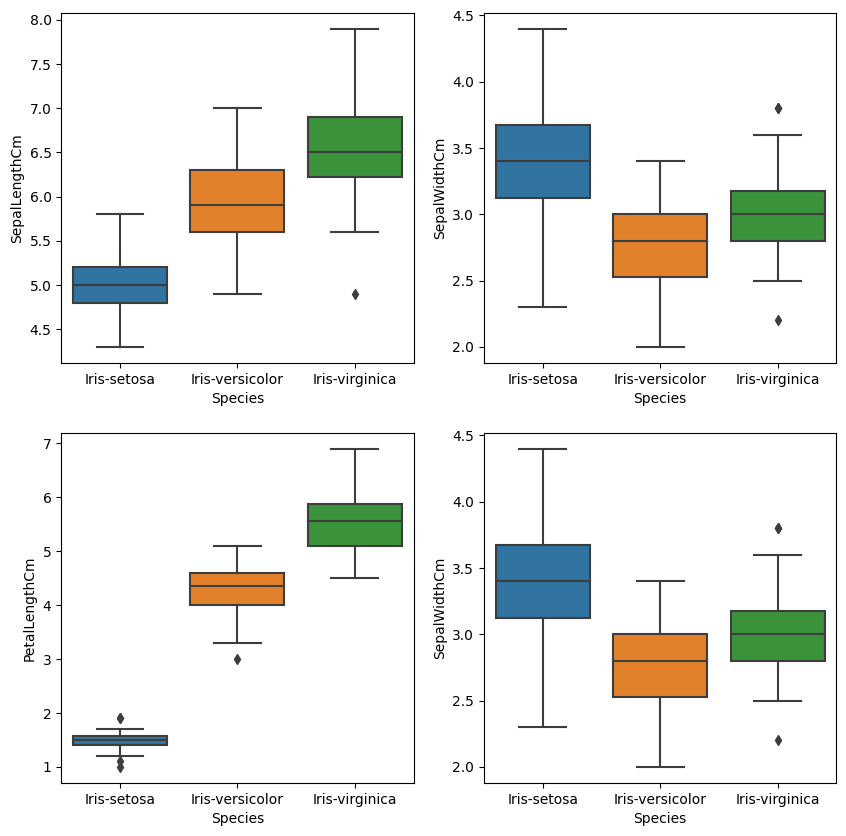

In [52]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(x= df['Species'],y=df['SepalLengthCm'])
plt.subplot(2,2,2)
sns.boxplot(x= df['Species'],y=df['SepalWidthCm'])
plt.subplot(2,2,3)
sns.boxplot(x= df['Species'],y=df['PetalLengthCm'])
plt.subplot(2,2,4)
sns.boxplot(x= df['Species'],y=df['SepalWidthCm'])
plt.show()

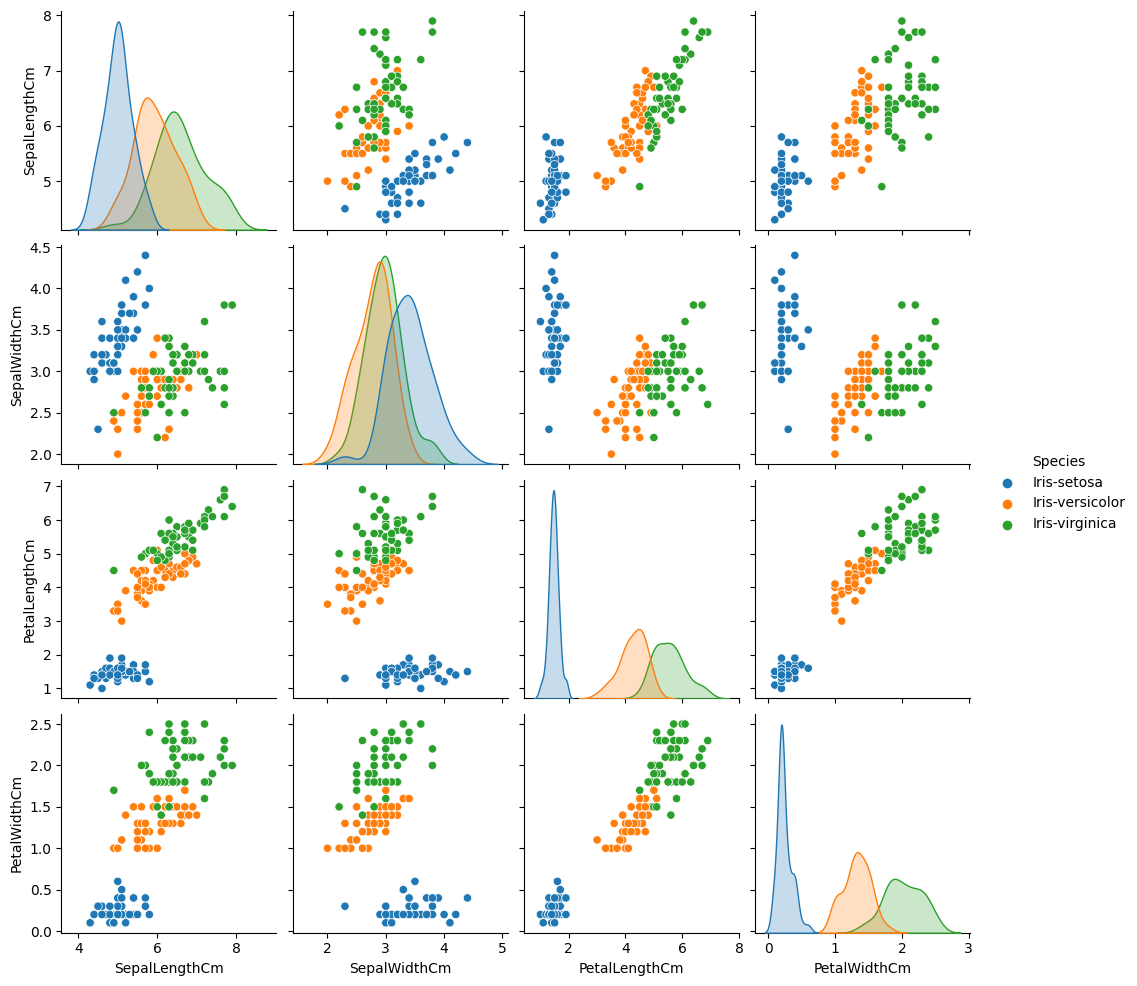

In [53]:
sns.pairplot(df,hue='Species')

In [54]:
df.groupby(['Species']).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


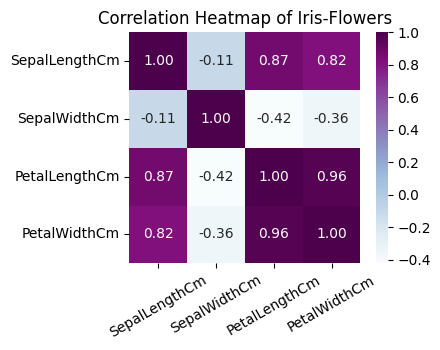

In [55]:
plt.figure(figsize=(4,3))
plt.title('Correlation Heatmap of Iris-Flowers')
ax = sns.heatmap(df.corr(), annot=True, square=True,  fmt='.2f',cmap='BuPu' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
sns.axes_style("white")
plt.show()

# Classifier using 2 features
- PetalLengthCm
- PetalWidthCm

In [56]:
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
Labeler = LabelEncoder()
svm = SVC()

In [57]:
def classifier2f(params,target):
    X = df[params]
    y = df[target]
    print('*'*55)
    print('Input Features:',params)
    print('Target Features:',target)
    y['Species'] = Labeler.fit_transform(df['Species'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=93)
    svm = SVC()
    svm.fit(X_train, y_train)
    print('Training Accuracy:',svm.score(X_train, y_train))
    print('Training Accuracy:',svm.score(X_test, y_test))
    y_pred = svm.predict(X_test)
    print(classification_report(y_test,y_pred))
    fig, ax = plt.subplots()
    plot_decision_regions(np.array(X_test), np.array(y_test[target[0]]), clf=svm, legend=2)
    plt.show()

*******************************************************
Input Features: ['PetalLengthCm', 'PetalWidthCm']
Target Features: ['Species']
Training Accuracy: 0.9809523809523809
Training Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



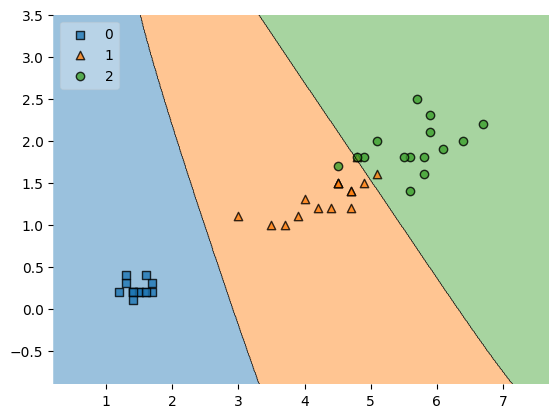

*******************************************************
Input Features: ['PetalLengthCm', 'SepalLengthCm']
Target Features: ['Species']
Training Accuracy: 0.9809523809523809
Training Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



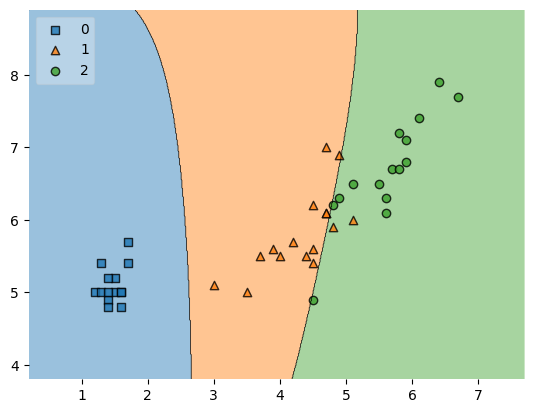

*******************************************************
Input Features: ['PetalWidthCm', 'SepalLengthCm']
Target Features: ['Species']
Training Accuracy: 0.9619047619047619
Training Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        16
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



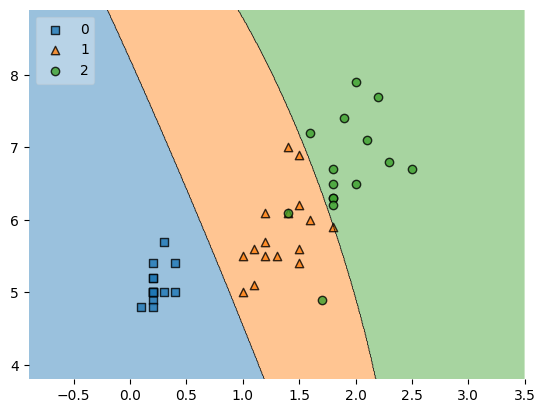

In [58]:
features = ['PetalLengthCm','PetalWidthCm','SepalLengthCm']
for i in range(0,3):
    for j in range(i+1,3):
        classifier2f([features[i],features[j]],['Species'])

## 3 Feature SVM
- SepalLengthCm
- PetalLengthCm
- PetalWidthCm

In [59]:
X = df[['SepalLengthCm','PetalLengthCm','PetalWidthCm']]
y = df[['Species']]

In [60]:
y['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [61]:
y['Species'] = Labeler.fit_transform(df['Species'])

In [62]:
y['Species'].unique()

array([0, 1, 2])

********************************************************************************
80
The accuracy of the svm classifier on training data is 1.00 out of 1
The accuracy of the svm classifier on test data is 0.78 out of 1


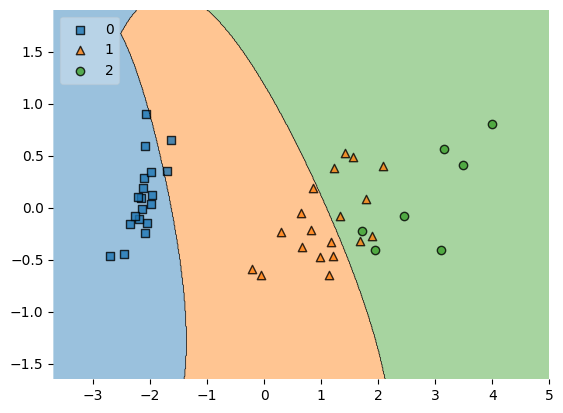

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.85      0.58      0.69        19
           2       0.47      1.00      0.64         7

    accuracy                           0.78        45
   macro avg       0.77      0.82      0.76        45
weighted avg       0.85      0.78      0.79        45

********************************************************************************
********************************************************************************
93
The accuracy of the svm classifier on training data is 1.00 out of 1
The accuracy of the svm classifier on test data is 0.87 out of 1


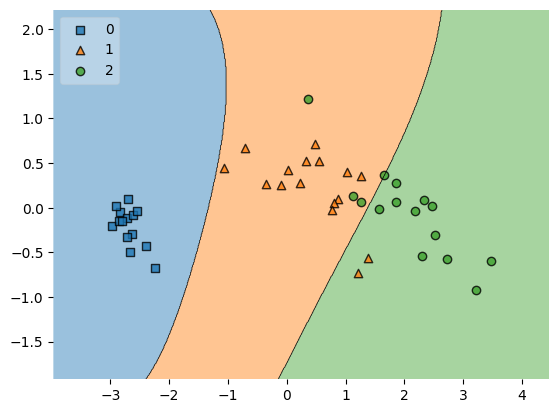

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.78      0.88      0.82        16
           2       0.85      0.73      0.79        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

********************************************************************************
********************************************************************************
147
The accuracy of the svm classifier on training data is 1.00 out of 1
The accuracy of the svm classifier on test data is 0.91 out of 1


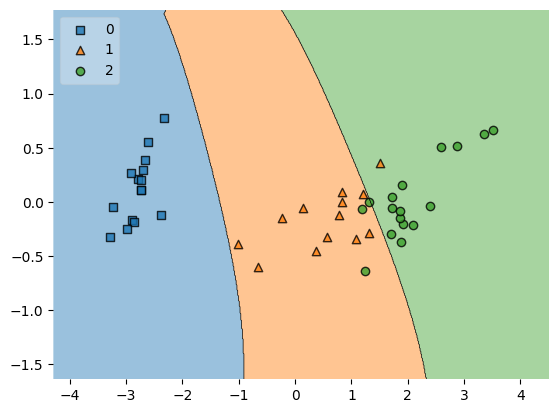

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      0.92      0.86        13
           2       0.93      0.82      0.87        17

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45

********************************************************************************


In [63]:

for i in range(0,200):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=i)
    pca = PCA(n_components = 2)
    X_train2 = pca.fit_transform(X_train)
    X_test2 = pca.fit_transform(X_test)
    svm = SVC(kernel='rbf',degree=2,gamma=0.3)
    svm.fit(X_train2, y_train)
    y_pred = svm.predict(X_test2)
    #svm.fit(X_train, y_train)
    if svm.score(X_train2, y_train) > 0.999:
        print('*'*80)
        print(i)
        print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train2, y_train)))
        print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test2, y_test)))
        plot_decision_regions(np.array(X_test2), np.array(y_test['Species']), clf=svm, legend=2)
        plt.show()
        print(classification_report(y_test,y_pred))
        print('*'*80)

********************************************************************************
The accuracy of the svm classifier on training data is 1.00 out of 1
The accuracy of the svm classifier on test data is 0.91 out of 1


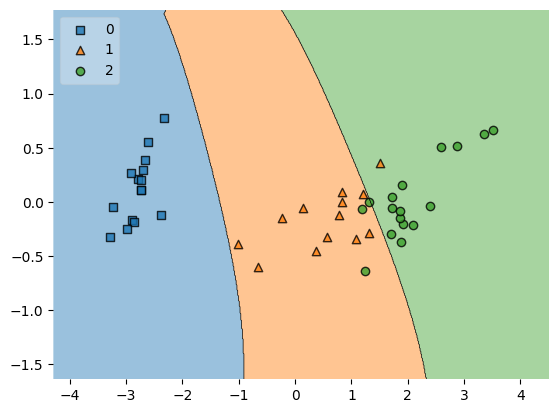

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      0.92      0.86        13
           2       0.93      0.82      0.87        17

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45

********************************************************************************


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=147)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.fit_transform(X_test)
svm = SVC(kernel='rbf',degree=2,gamma=0.3)
svm.fit(X_train2, y_train)
y_pred = svm.predict(X_test2)
#svm.fit(X_train, y_train)
print('*'*80)
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train2, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test2, y_test)))
plot_decision_regions(np.array(X_test2), np.array(y_test['Species']), clf=svm, legend=2)
plt.show()
print(classification_report(y_test,y_pred))
print('*'*80)

## Seems like 4 Featured SVM doesnt work that much while not having cost